In [1]:
import os
import glob
import pandas as pd
import bootcamp_utils
import dabest

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pwd

'/Users/michaelpiacentino/Drive/git/data/dnBMPR1A/MigrationArea'

In [3]:
# Add analysis date here to apply to dataframe
analysis_date = '20190109'

path = os.path.abspath('')+'/CSVs/'
full_df = pd.DataFrame()
list_ = []

# For loop to bring in files and concatenate them into a single dataframe
for file_ in glob.glob(path + "/*.csv"):
    df = pd.read_csv(file_)
    # Determine Image name from file name
    df['Image'] = os.path.splitext(os.path.basename(file_))[0]
    # Split values in ROI label and Image name columns
    df['delete1'], df['ROI'], df['delete2'], df['delete3'] = zip(*df['Label'].map(lambda x: x.split(':')))
    (df['ExptDate'], df['Treatment'], df['Dose'], df['Stains'], df['Embryo'], 
        df['Somites'], df['ImageMag']) = zip(*df['Image'].map(lambda x: x.split('_')))
    list_.append(df)

full_df = pd.concat(list_)
full_df = full_df.drop(['Label', 'Mean', 'IntDen', 'RawIntDen', 'delete1', 'delete2', 'delete3'], axis=1)
full_df.head()

,,Area,Image,ROI,ExptDate,Treatment,Dose,Stains,Embryo,Somites,ImageMag
0,1,50227.996,20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb...,CntlArea,20181125,pCAGdnBMPR1AFLAG,3ugul,NC11m3eGFP,Emb7,8ss,5x
1,2,41313.891,20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb...,ExptArea,20181125,pCAGdnBMPR1AFLAG,3ugul,NC11m3eGFP,Emb7,8ss,5x
0,1,50345.894,20190108_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFPFLAG...,CntlArea,20190108,pCAGdnBMPR1AFLAG,3ugul,NC11m3eGFPFLAGSnai2,Emb3,7ss,5x
1,2,35172.459,20190108_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFPFLAG...,ExptArea,20190108,pCAGdnBMPR1AFLAG,3ugul,NC11m3eGFPFLAGSnai2,Emb3,7ss,5x
0,1,75929.012,20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb...,CntlArea,20181125,pCAGdnBMPR1AFLAG,3ugul,NC11m3eGFP,Emb2,8ss,5x


In [4]:
# Get a list of treatments
treatment_list = full_df.Treatment.unique()
treatment_list = treatment_list.tolist()

# Group dataframe by treatment
df_byTreatment = full_df.groupby(['Treatment', 'Image', 'ROI'])['Image', 'ROI', 'Area', 'Treatment'].mean()

# Loop trough treatments, performing each analysis and exporting CSV file for each treatment
for i in treatment_list:
    # Slice dataframe to process only embryos with given treatment
    treatment = i
    df_treatment = pd.DataFrame(df_byTreatment.xs(treatment))

    # Extract Cntl and Expt areas
    area_cntl = df_treatment.xs('CntlArea', level='ROI')
    area_expt = df_treatment.xs('ExptArea', level='ROI')

    # Generate Expt/Cntl Area Ratios
    area_ratios = pd.DataFrame(area_expt / area_cntl)
    area_ratios.columns = ['Expt/Cntl Area']

    # Normalize all migration area values to mean of control group
    norm_cntl = area_cntl/(float(area_cntl.mean()))
    norm_cntl.columns = ['Norm Cntl Area']
    norm_expt = area_expt/(float(area_cntl.mean()))
    norm_expt.columns = ['Norm Expt Area']
    norm_areas = pd.concat([norm_cntl, norm_expt], axis=1, sort=False)

    # Combine processed values into single dataframe and output as csv file analysis date + 'MigrationResults.csv'
    area_cntl = pd.DataFrame(area_cntl)
    area_cntl.columns = ['Cntl Area']
    area_expt = pd.DataFrame(area_expt)
    area_expt.columns = ['Expt Area']
    results = pd.concat([area_cntl, area_expt, area_ratios, norm_cntl, norm_expt], axis=1, sort=True)
    results.to_csv(analysis_date + '_' + treatment + '_MigrationResults.csv')

results.head()

,Cntl Area,Expt Area,Expt/Cntl Area,Norm Cntl Area,Norm Expt Area
Image,,,,,
20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb1_8ss_5x,70461.991,54508.613,0.773589,1.268194,0.981061
20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb2_8ss_5x,75929.012,49886.668,0.657017,1.366591,0.897874
20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb3_8ss_5x,39952.701,31338.701,0.784395,0.719079,0.564042
20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb4_8ss_5x,61545.413,46787.508,0.760211,1.107711,0.842094
20181125_pCAGdnBMPR1AFLAG_3ugul_NC11m3eGFP_Emb5_8ss_5x,53938.908,45332.329,0.840438,0.970807,0.815903


In [5]:
results = results.reset_index()

In [6]:
# Run statistical analysis on datasets
# Calculate means, SEMs, and 95% Confidence Interval
means = results.mean()
means.head()
sems = results.sem()
sems.head()


Cntl Area         2862.779175
Expt Area         2188.904365
Expt/Cntl Area       0.022232
Norm Cntl Area       0.051525
Norm Expt Area       0.039396
dtype: float64

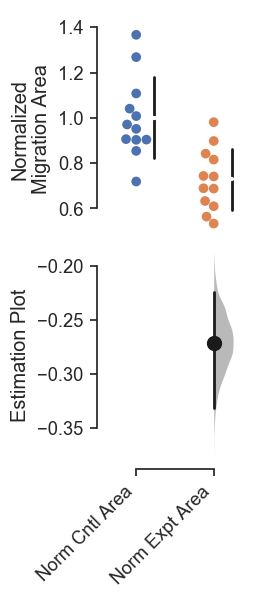

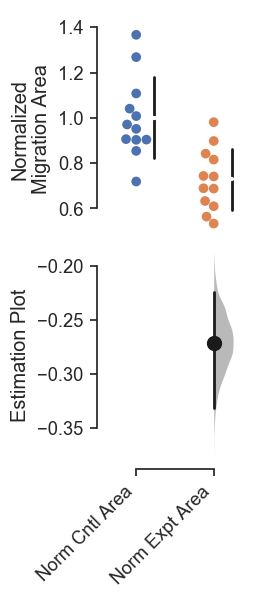

In [8]:
fig1, result1 = dabest.plot(results, idx=('Norm Cntl Area', 'Norm Expt Area'),
                            paired=True, show_pairs=False, #defines paired analysis, but shows individual plots
                            id_col='Image', #need to define an ID column for a paired analysis
                            show_group_count=False,
                            font_scale=0.8,
                            dpi=100,
                            fig_size=(2,6),
                            tick_length=5,
                            float_contrast=False,
                            swarm_dotsize=7,
                            summary_linewidth=2,
                            ci_linewidth=2,
                            swarm_label='Normalized\nMigration Area',
                            contrast_label='Estimation Plot',
                           )
result1
fig1

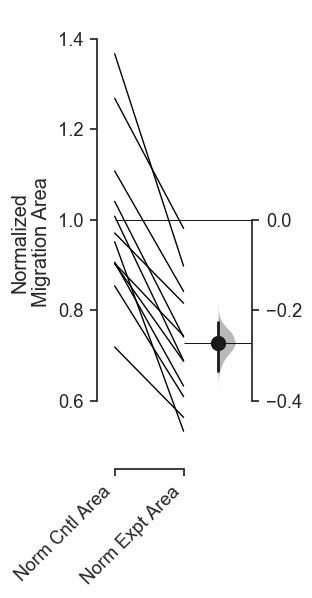

In [9]:
fig1, result1 = dabest.plot(results, idx=('Norm Cntl Area', 'Norm Expt Area'),
                            paired=True, show_pairs=True, #defines paired analysis, but shows individual plots
                            id_col='Image', #need to define an ID column for a paired analysis
                            show_group_count=False,
                            font_scale=0.8,
                            dpi=100,
                            fig_size=(2,6),
                            tick_length=5,
                            float_contrast=True,
                            swarm_dotsize=7,
                            summary_linewidth=2,
                            ci_linewidth=2,
                            swarm_label='Normalized\nMigration Area',
                            contrast_label='Estimation Plot',
                           )